In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emachine as EM

In [2]:
np.random.seed(0)

In [3]:
s0 = np.loadtxt('../MNIST_data/mnist_test.csv',delimiter=',')

In [4]:
seq = s0[:,1:] 
label = s0[:,0]
print(seq.shape,label.shape)

(10000, 784) (10000,)


In [5]:
# select only 1 digit
digit = 8
i = label == digit
label1 = label[i]
seq1 = seq[i]
print(digit,seq1.shape,label1.shape)

# convert to binary
seq1 = np.sign(seq1-1.5)

8 (974, 784) (974,)


In [6]:
# cut the boudaries 
# combine pixels to reduce the size of image
n = seq1.shape[0]
m = int(np.sqrt(seq1.shape[1]))
seq2 = seq1.reshape(n,m,m) # recover the image
print(seq2.shape)

# reduce the size
#seq2 = seq2[:,4:24,4:24]
# 3D to 2D
#seq1 = seq2.reshape(n,-1)

(974, 28, 28)


In [7]:
seq2.shape

(974, 28, 28)

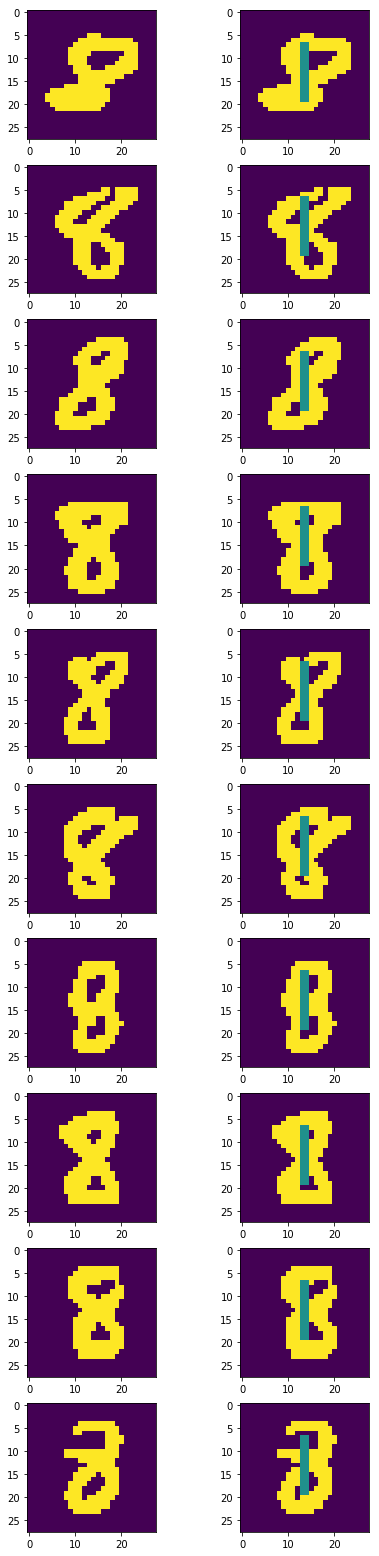

In [8]:
# create obs seqs
seq_obs = np.zeros((n,m,m))
#m_obs = int(m/2)
#m1_obs = 12
#m2_obs = 15
#seq_obs[:,:m_obs,:] = seq2[:,:m_obs,:]
#seq_obs[:,m_obs:,:m1_obs] = seq2[:,m_obs:,:m1_obs]
#seq_obs[:,m_obs:,m2_obs:] = seq2[:,m_obs:,m2_obs:]

seq_obs = np.copy(seq2)
seq_obs[:,7:20,13:15] = 0.

nx,ny = 2,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
#for i in range(ny):
i = 2
ax[i,0].imshow(seq2[i],interpolation='nearest')
ax[i,1].imshow(seq_obs[i],interpolation='nearest')

In [9]:
# observed columns
seq_obs1 = seq_obs.reshape(n,-1)
m = seq_obs1.shape[1]
cols_obs = [i for i in range(m) if seq_obs1[0,i] != 0]
len(cols_obs)

758

In [10]:
cols_hidden = np.setdiff1d(np.arange(m),cols_obs)
print(len(cols_hidden))
np.savetxt('cols_obs.txt',cols_obs,fmt='%i')
np.savetxt('cols_hidden.txt',cols_hidden,fmt='%i')

26
